In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('/content/titanic.csv')

In [3]:
# Check the head of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get the shape of the data, gives nb or rows then nb of columns
data.shape

(891, 12)

In [5]:
# Statistics of the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Get information about the fields
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Get the null data
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Remove the redundant features, features we don't need for the analysis
data = data.drop(columns = ['Name', 'Ticket'])
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# Get the percentage of null or missing data
data.isnull().sum() / data.shape[0]

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,0.771044
Embarked,0.002245


In [10]:
# Clean the data
# Cabin column has more than 25% missing data, remove entire feature
data = data.drop(columns = 'Cabin')
# Embarked column has very few missing data, remove the observertions
# axis = 0 means row, axis = 1 means column
# inplace means removing only those particular rows
data.dropna(subset = ['Embarked'], axis = 0, inplace = True)

data.shape

(889, 9)

In [11]:
# Insert or fill the null values in the Age feature
data = data.fillna(data.Age.mean())
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# Analysis over Stack Overflow dataset  ->  Kaggle

In [12]:
!pip install kaggle

In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
os.environ['KAGGLE_USERNAME'] = 'evanch317'
os.environ['KAGGLE_KEY'] = '60b2ae81b7f2ce63f48395c15ca33af3'

In [14]:
# Download the dataset from kaggle
!kaggle datasets download stackoverflow/stack-overflow-2018-developer-survey

Dataset URL: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey
License(s): DbCL-1.0
  0% 0.00/19.6M [00:00<?, ?B/s]
100% 19.6M/19.6M [00:00<00:00, 1.07GB/s]


In [15]:
# Unzip the dataset
!unzip /content/stack-overflow-2018-developer-survey.zip

Archive:  /content/stack-overflow-2018-developer-survey.zip
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the data
data = pd.read_csv('/content/survey_results_public.csv')
data.shape

/tmp/ipython-input-4147723060.py:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/survey_results_public.csv')


(98855, 129)

In [18]:
# Load the schema
schema = pd.read_csv('/content/survey_results_schema.csv')
schema.shape

(129, 2)

In [19]:
# 1. Count the number of null values in each feature
data.isnull().sum()

,0
Respondent,0
Hobby,0
OpenSource,0
Country,412
Student,3954
...,...
Age,34281
Dependents,36259
MilitaryUS,83074
SurveyTooLong,32914


In [20]:
# 2. Count the percentage of null values
data.isnull().sum() * 100 / data.shape[0]

,0
Respondent,0.000000
Hobby,0.000000
OpenSource,0.000000
Country,0.416772
Student,3.999798
...,...
Age,34.678064
Dependents,36.678974
MilitaryUS,84.036215
SurveyTooLong,33.295230


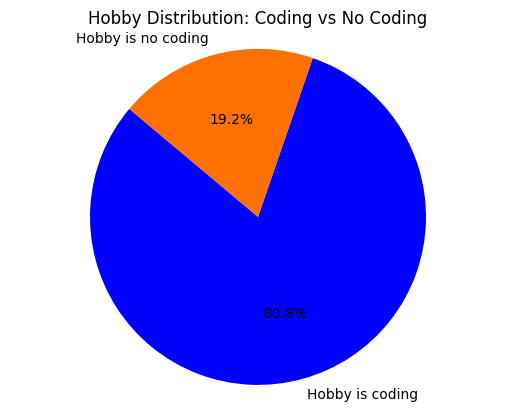

In [21]:
# 3. Draw the pie chart for the number of people who finds coding as hobby
coding = len(data[data['Hobby'] == 'Yes'])
no_coding = len(data[data['Hobby'] == 'No'])

sizes = [coding, no_coding]
labels = ['Hobby is coding', 'Hobby is no coding']
colors = ['#0000fe', '#fe7000']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Hobby Distribution: Coding vs No Coding')
plt.axis('equal')
plt.show()

In [22]:
# 4. Determine the number of people contributing to open source projects
len(data[data['OpenSource'] == 'Yes'])

43086

In [23]:
# 5. Determine the top 20 countries from where the responses are obtained
data['Country'].value_counts().head(20)

,count
Country,
United States,20309
India,13721
Germany,6459
United Kingdom,6221
Canada,3393
Russian Federation,2869
France,2572
Brazil,2505
Poland,2122


### 6. Do other 5 analysis as per your own thinking (Which involves different charts or graphs)

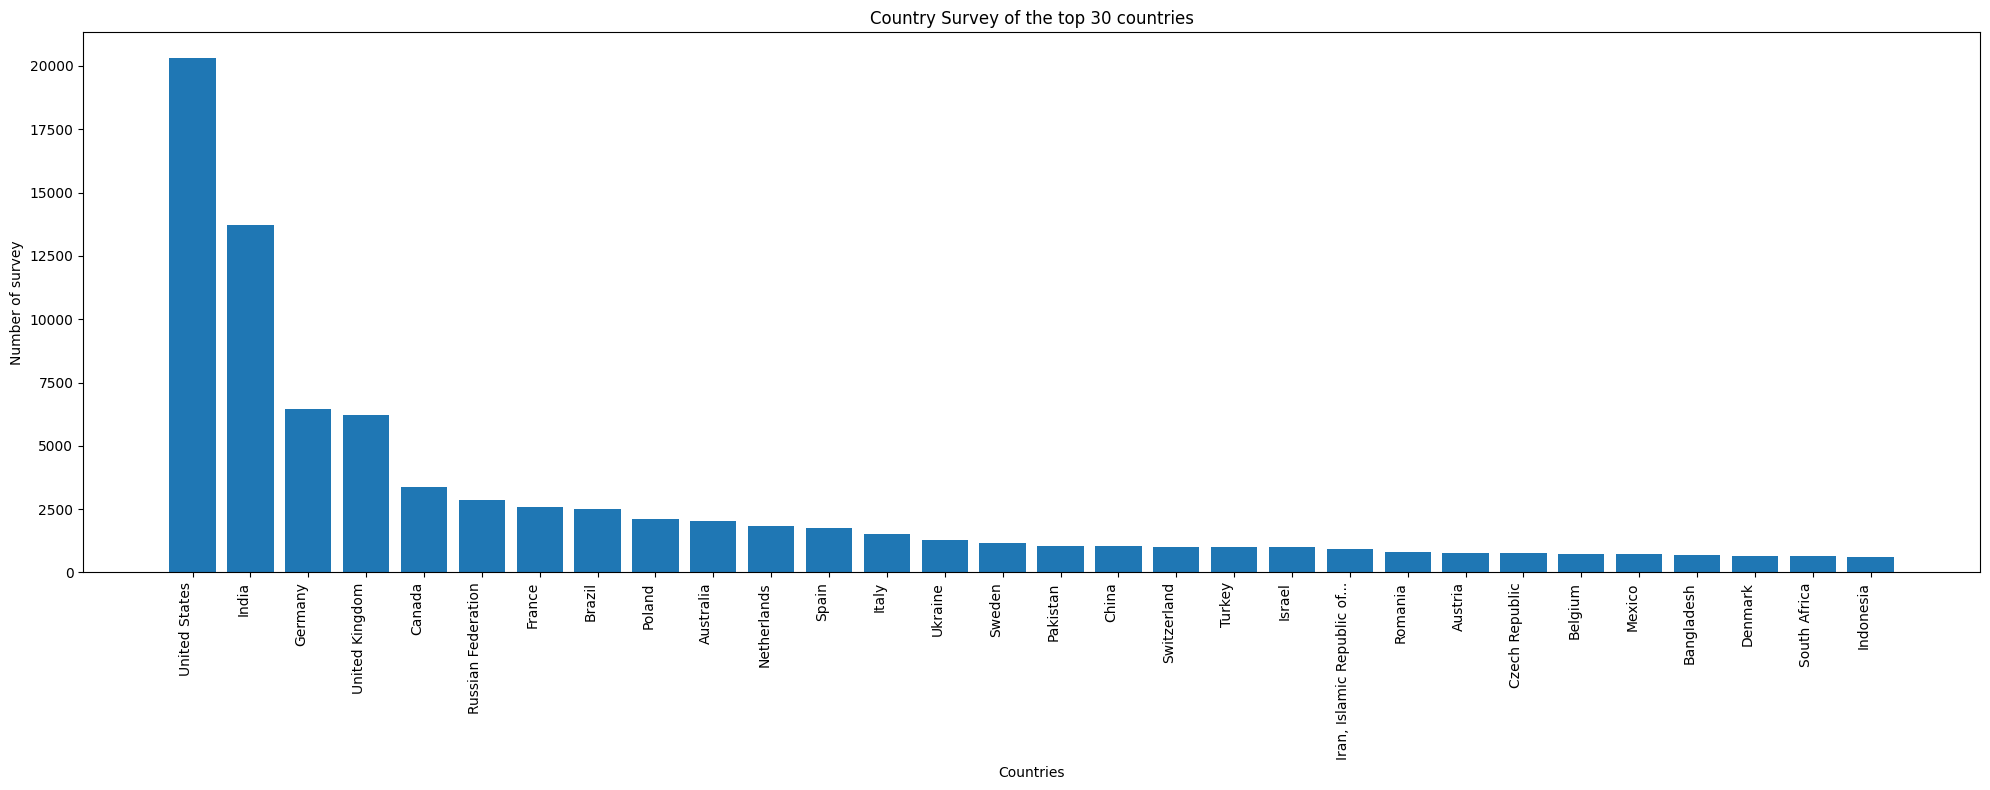

In [24]:
# Analysis 1: Bar Chart of the survey taken for the 30 first countries
countries = data['Country'].value_counts().head(30)
plt.figure(figsize=(20, 8))
plt.bar(countries.index,countries.values)
plt.title('Country Survey of the top 30 countries')
plt.xlabel('Countries')
plt.ylabel('Number of survey')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

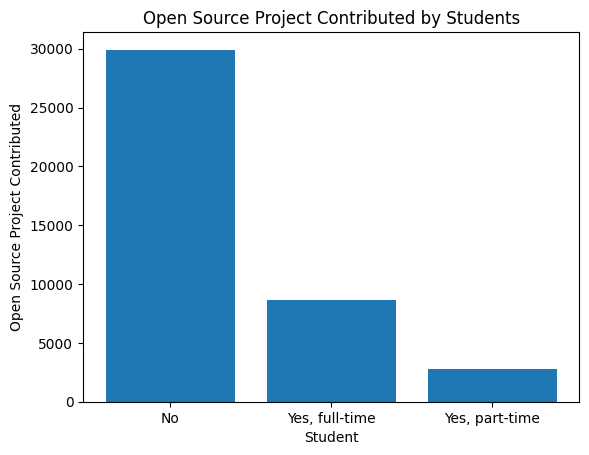

In [25]:
# Analysis 2: Distribution of people contributing to open source projects as a student
open_source = data[data['OpenSource'] == 'Yes'].groupby('Student').size().reset_index(name='Count')
plt.bar(open_source['Student'],open_source['Count'])
plt.title('Open Source Project Contributed by Students')
plt.xlabel('Student')
plt.ylabel('Open Source Project Contributed')
plt.show()

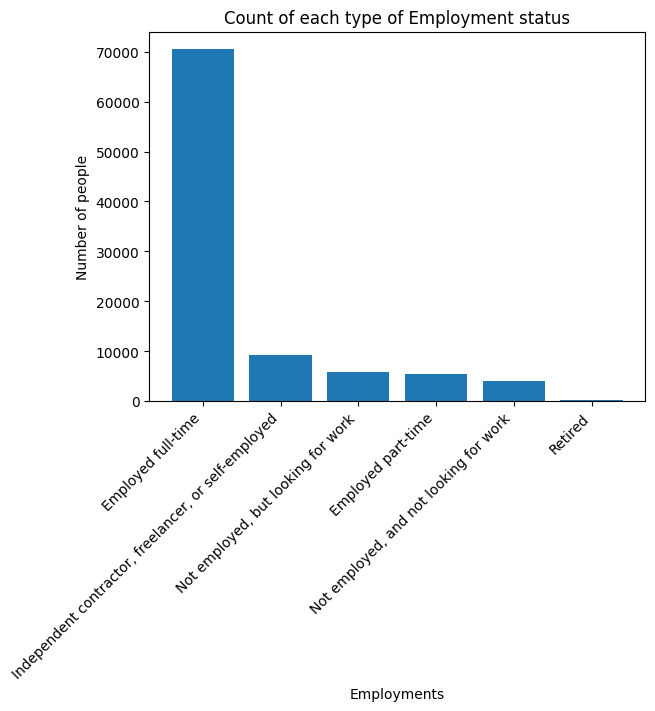

In [26]:
# Analysis 3: Count each type of Employment status
employment = data['Employment'].value_counts()
plt.bar(employment.index,employment.values)
plt.title('Count of each type of Employment status')
plt.xlabel('Employments')
plt.ylabel('Number of people')
plt.xticks(rotation=45,ha='right')
plt.show()

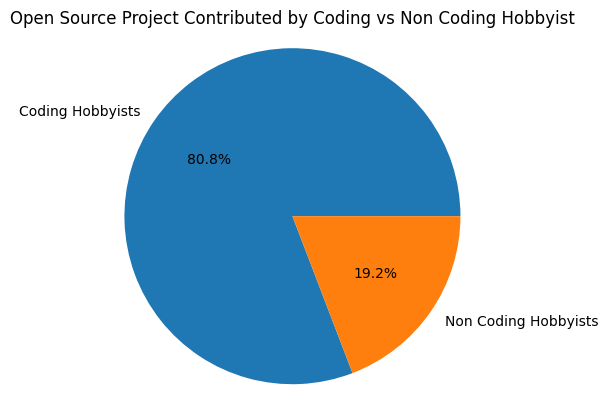

In [27]:
# Analysis 4: Coding and no codding hobbyist Open Source Project contribution
coding_os = data[data['OpenSource'] == 'Yes']
counts = data['Hobby'].value_counts();
sizes = [counts.get('Yes',0),counts.get('No',0)]
labels = ['Coding Hobbyists', 'Non Coding Hobbyists']
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Open Source Project Contributed by Coding vs Non Coding Hobbyist')
plt.axis('equal')
plt.show()

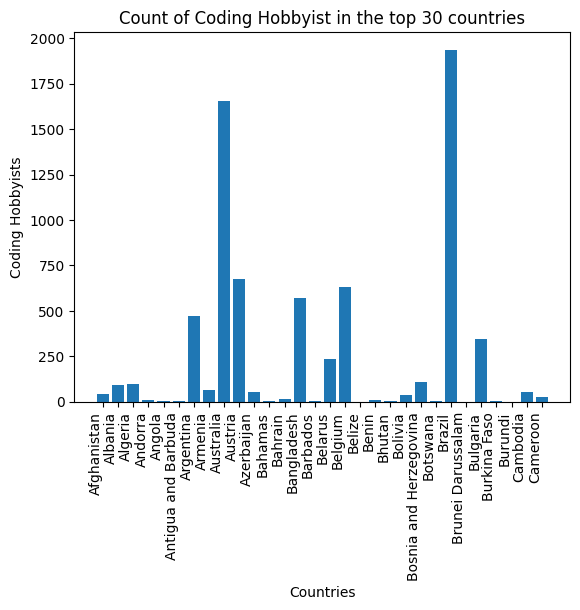

In [28]:
# Analysis 5: Count of Coding Hobbyist in the top 30 countries
coding_country = data[data['Hobby'] == 'Yes'].groupby('Country').size().reset_index(name='Count')
plt.bar(coding_country['Country'].head(30),coding_country['Count'].head(30))
plt.title('Count of Coding Hobbyist in the top 30 countries')
plt.xlabel('Countries')
plt.ylabel('Coding Hobbyists')
plt.xticks(rotation=90, ha='right')
plt.show()